In [ ]:
%matplotlib inline

In [ ]:
! jt -t grade3 -nf opensans

<h1><center>1. Load Data</center></h1>



In [1]:
import os
import json
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from synthesized.testing.plotting import plot_avg_distances

def run_baseline_evaluation(evaluation, evaluation_name, config):
    config = configs["instances"][evaluation_name]
    evaluation.record_config(evaluation=evaluation_name, config=config)
    data = pd.read_csv(evaluation.configs[evaluation_name]['data'])
    data = data.drop(evaluation.configs[evaluation_name]['ignore_columns'], axis=1)
    data.dropna(inplace=True)
    
    train, test = train_test_split(data, test_size=0.5)

    plot_avg_distances(train, test, evaluation, evaluation_name)


## credit_scoring

/Users/tonbadal/PycharmProjects/synthesized/synthesized/testing/plotting.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for i in range(len(test.columns)):


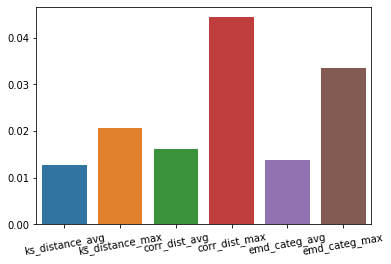

## claim_prediction

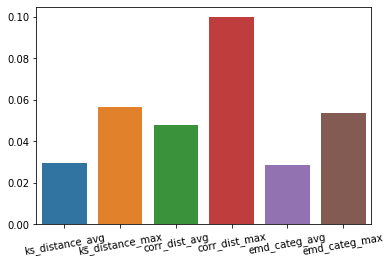

## default_on_loan_payment

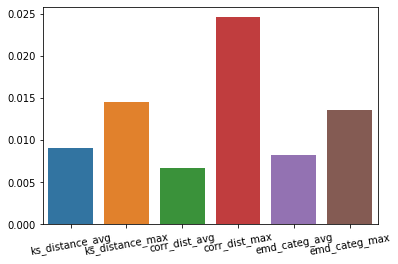

## fraud_detection

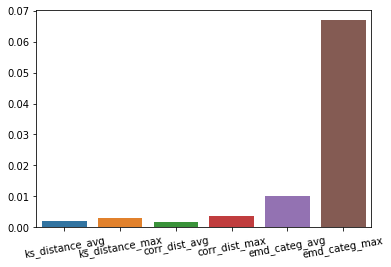

## segmentation_analysis

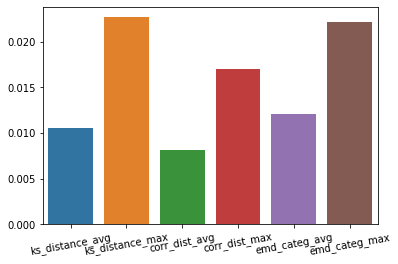

## sales_pipeline

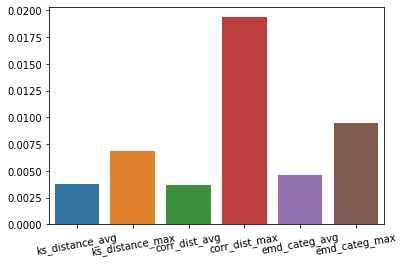

## housing_prices

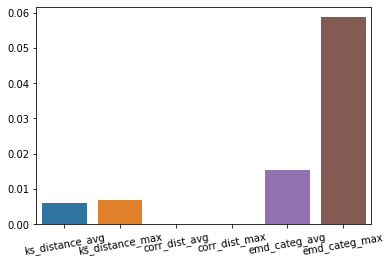

## insurance_quote_conversion

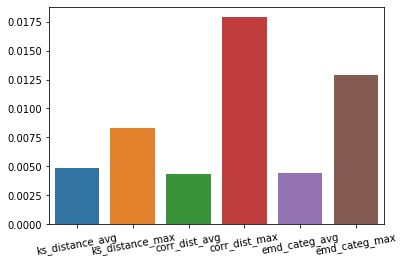

## business_property_insurance_risk

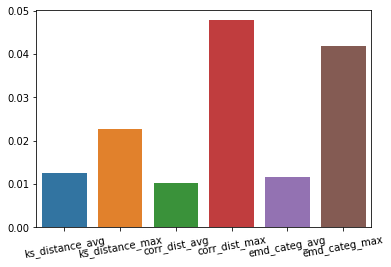

## vehicle_insurance_claim_prediction

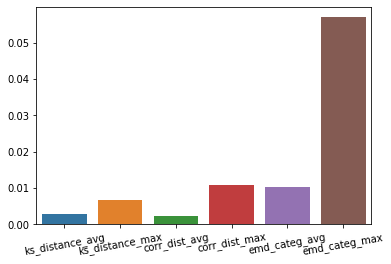

## pricing_of_goods_at_different_locations

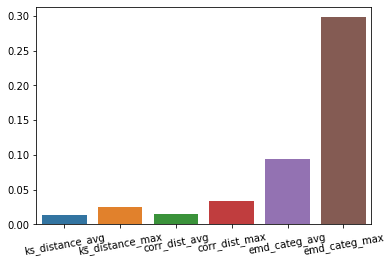

## prediction_of_electric_motor_temperature

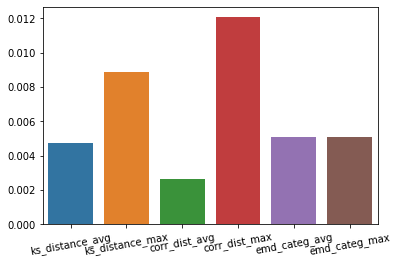

## ibm_watson_marketing_customer_value_data

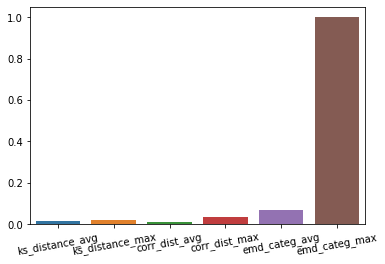

## bank_marketing_dataset

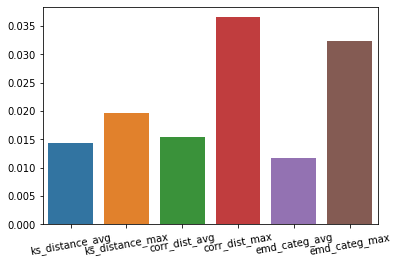

## bank_loan_status

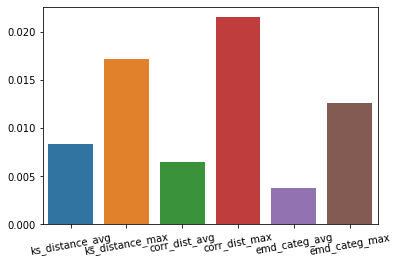

## medical_appointment_no_shows

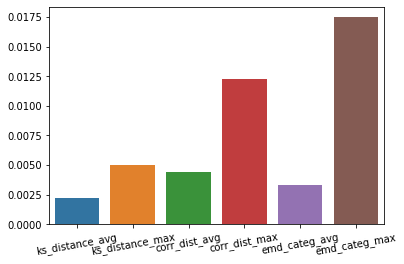

## diabetes_dataset

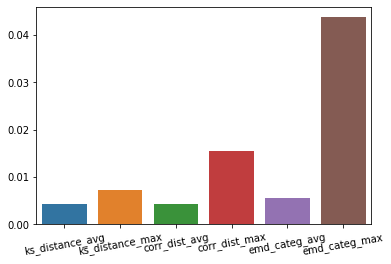

## bank_churn_modelling

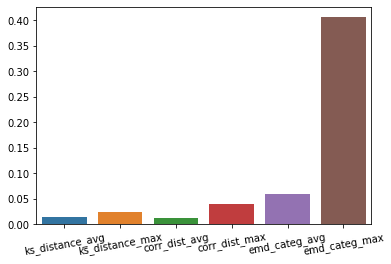

## telecom_customer_churn

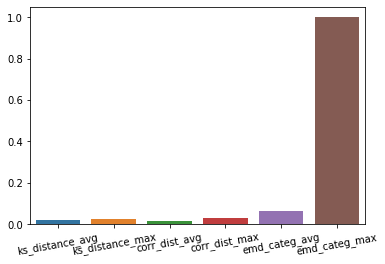

## synthetic_fraud_data_from_a_financial_payment_system

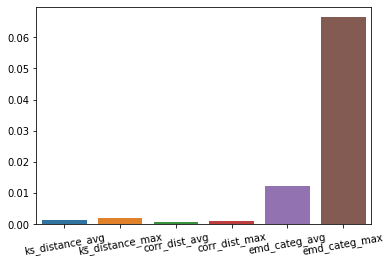

## air_quality_data_set

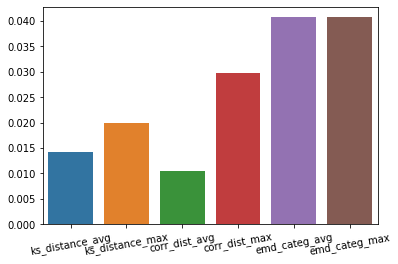

## epileptic_seizure_recognition_data_set

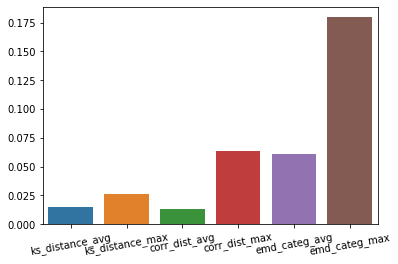

## nursery_school_application_decision

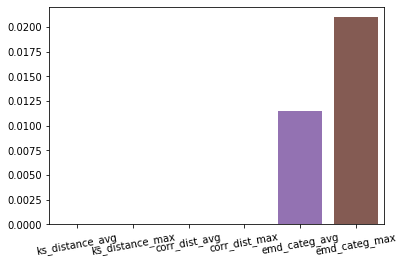

## occupancy_detection

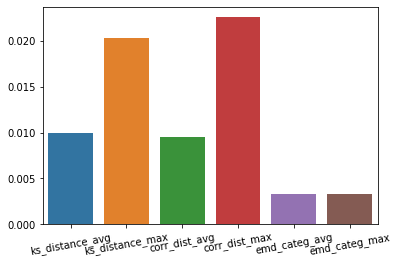

## student_information

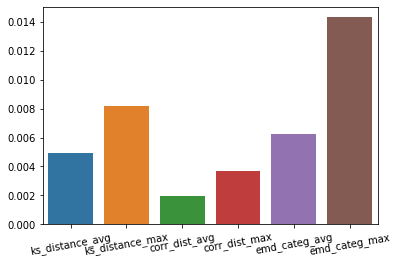

## atlas_higgs_boson_detection_data_set

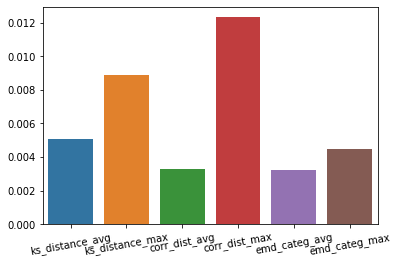

## big_cities_health_coalition_dataset

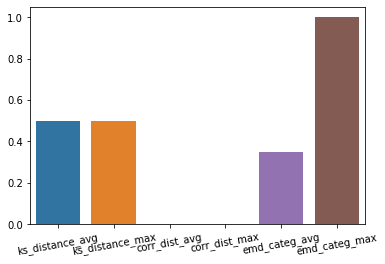

## medicare_provider_utilization_and_payment_dataset

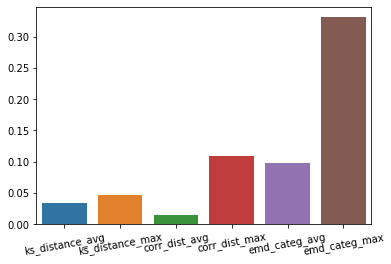

In [44]:
from sklearn.model_selection import train_test_split
from synthesized.testing.evaluation import Evaluation
from synthesized.testing import plotting as syn_plot
from IPython.display import Markdown, display

evaluation_name = os.environ.get('EVALUATION_NAME', 'n/a')
branch = os.environ.get('EVALUATION_BRANCH', 'n/a')
revision = os.environ.get('EVALUATION_REVISION', 'n/a')
evaluation = Evaluation(branch=branch, revision=revision, group="dataset_evaluation")

config_path = os.environ.get('EVALUATION_CONFIG_PATH', 'n/a')

with open(config_path, 'r') as f:
    configs = json.load(f)

for evaluation_name, config in configs['instances'].items():
    display(Markdown("## {}".format(evaluation_name)))
    
    config['data'] = '../evaluator/synthesized/' + config['data']
    
    run_baseline_evaluation(evaluation, evaluation_name, config)


In [32]:
evaluation.write_metrics()

,corr_dist_avg,corr_dist_max,emd_categ_avg,emd_categ_max,ks_distance_avg,ks_distance_max
business_property_insurance_risk,0.011946,0.040403,0.013475,0.044260,0.013465,0.026052
claim_prediction,0.032503,0.088692,0.000000,0.000000,0.022795,0.038864
credit_scoring,0.018161,0.091627,0.029537,0.029537,0.014391,0.026741
default_on_loan_payment,0.006481,0.027231,0.000000,0.000000,0.005933,0.011200
fraud_detection,0.001847,0.002567,0.010679,0.066574,0.002370,0.003620
housing_prices,0.000000,0.000000,0.015240,0.054782,0.003396,0.003507
insurance_quote_conversion,0.004291,0.017970,0.010897,0.087404,0.004425,0.011193
sales_pipeline,0.004967,0.013886,0.004688,0.007242,0.004893,0.009291
segmentation_analysis,0.007960,0.014594,0.008351,0.016128,0.007421,0.014659
vehicle_insurance_claim_prediction,0.002870,0.009711,0.012229,0.056446,0.002730,0.005754
